# Speech – Music Recognition
Use GTZAN music genre dataset for classifying the song genre. **Train a RNN** that takes a
**song as an input** and **predicts the corresponding genre for the song**. For implementation
purposes, you can just use **a specific time duration of the song as input** (Eg: Just the first
10-20 seconds of each song). The dataset has a total of 10 classes, you may train for **any
5 or all the classes** using **90% of available data for training and rest for the test dataset**.

In [1]:
!pip install librosa

## importing libraries 

In [1]:
# python libraries for data manipulation and math
import os
import numpy as np
import matplotlib.pyplot as plt

# python library for understanding music(".wav" files) 
import librosa , librosa.display

# python library for providing dataset(train and test sets)
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
from sklearn.model_selection import train_test_split

# python libraries for creating and training RNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization,Flatten

## visualizing a single input music data(or ".wav" file)

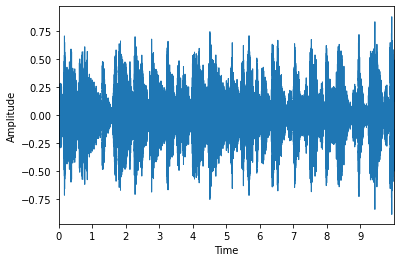

In [2]:
# Displaying the audio file data in form of a graph with y-axis = amplitude and x-axis = time  
file = 'data/genres_original/blues/blues.00000.wav'
Signal , sr = librosa.load(file , offset=10.0, duration=10) 
librosa.display.waveplot(Signal , sr = sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

## Feature Extraction

In [3]:
n_fft = 2048 # the window
hop_length = 512 # the amount of shifting the window to the right
num_mfcc = 40 # Mel-frequency cepstral coefficients 
dataset_path = "data/genres_original"
scaler = MinMaxScaler() #StandardScaler()
features = []
labels = []
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
    if i==0:
        continue
    #  As per the given instructions, considering train data for any 5 classes
    if i<6:
        class_n = dirpath.split('\\')[-1]
        print(f"Extracting the features of music files from '{dirpath}' and creating class '{class_n}' denoted as '{i-1}'")
        for file in filenames:
            temp = []
            # As per the given instructions, only a specific time duration of the song as input is considered(i.e. start at 10 sec end at 20 sec) 
            Signal , sr = librosa.load(f"{dirpath}\{file}" , offset=10.0, duration=10)
            #print(Signal.shape)
            mfcc = librosa.feature.mfcc(Signal, sr, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
            mfcc = mfcc.T
            for col in range(mfcc.shape[-1]):
                mean_value = (mfcc[:,col]).mean()
                temp.append(mean_value)
            
            np.array(temp)
            features.append(temp)
            labels.append(i-1)

Extracting the features of music files from 'data/genres_original\blues' and creating class 'blues' denoted as '0'
Extracting the features of music files from 'data/genres_original\classical' and creating class 'classical' denoted as '1'
Extracting the features of music files from 'data/genres_original\country' and creating class 'country' denoted as '2'
Extracting the features of music files from 'data/genres_original\disco' and creating class 'disco' denoted as '3'
Extracting the features of music files from 'data/genres_original\hiphop' and creating class 'hiphop' denoted as '4'


## Using the extracted features to create train and test datasets

In [6]:
# reshaping the features 
features = np.array(features)
features = features.reshape(features.shape[0],features.shape[1],1)
features.shape

(500, 40, 1)

In [7]:
labels = np.array(labels)
labels.shape

(500,)

In [8]:
# As per the given instructions, splitting 90% of available data for training and rest for the test dataset
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size=0.1,random_state=1)

In [22]:
X_test.shape

(50, 40, 1)

## Instantiating a RNN(Recursive Neural Network) model   

In [13]:
model = Sequential()
# Long Short-Term Memory layer
model.add(LSTM(64, input_shape=(X_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation='softmax'))


opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 40, 64)            16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 40, 64)            256       
_________________________________________________________________
lstm_4 (LSTM)                (None, 40, 64)            33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 40, 64)            256       
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)               

## Training the RNN model

In [15]:
#callback = tf.keras.callbacks.EarlyStopping()
history = model.fit(X_train,y_train, epochs = 100, batch_size = 32,validation_split = 0.1)#,callbacks=[callback])

Epoch 1/100
13/13 [==============================] - 8s 153ms/step - loss: 1.7865 - accuracy: 0.2847 - val_loss: 1.5971 - val_accuracy: 0.1778
Epoch 2/100
13/13 [==============================] - 1s 43ms/step - loss: 1.6280 - accuracy: 0.2771 - val_loss: 1.5953 - val_accuracy: 0.2000
Epoch 3/100
13/13 [==============================] - 1s 43ms/step - loss: 1.4551 - accuracy: 0.3937 - val_loss: 1.5647 - val_accuracy: 0.2889
Epoch 4/100
13/13 [==============================] - 1s 43ms/step - loss: 1.4974 - accuracy: 0.3306 - val_loss: 1.5543 - val_accuracy: 0.3556
Epoch 5/100
13/13 [==============================] - 1s 43ms/step - loss: 1.4209 - accuracy: 0.3959 - val_loss: 1.5307 - val_accuracy: 0.3556
Epoch 6/100
13/13 [==============================] - 1s 43ms/step - loss: 1.4198 - accuracy: 0.4135 - val_loss: 1.5266 - val_accuracy: 0.3556
Epoch 7/100
13/13 [==============================] - 1s 45ms/step - loss: 1.3729 - accuracy: 0.4102 - val_loss: 1.4856 - val_accuracy: 0.4222
Epoch

## Visualizing the performance of the RNN model

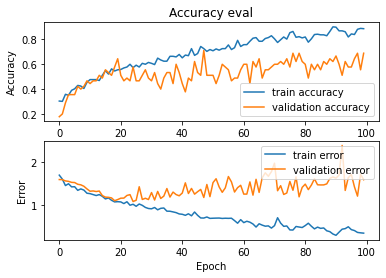

In [18]:
def plot_history(history):
    fig,axs = plt.subplots(2)
    axs[0].plot(history.history["accuracy"],label="train accuracy")
    axs[0].plot(history.history["val_accuracy"],label="validation accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc='lower right')
    axs[0].set_title("Accuracy eval")
    
    axs[1].plot(history.history["loss"],label="train error")
    axs[1].plot(history.history["val_loss"],label="validation error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc='upper right')
    plt.show()

plot_history(history)

## Evaluating the RNN model Using the test data

In [24]:
res = model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 13ms/step - loss: 0.9785 - accuracy: 0.6800


In [27]:
print(f"accuracy of RNN Model is : {res[1]*100}%")

accuracy of RNN Model is : 68.00000071525574%
